In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
url1 = ('/Users/javi/Desktop/Ironhack/Entregas de github/Ironhack-Project-2/Raw data/df_final_demo_cleaned.csv')
url2 = ('/Users/javi/Desktop/Ironhack/Entregas de github/Ironhack-Project-2/Raw data/df_final_experiment_clients_cleaned.csv')
url3 = ('/Users/javi/Desktop/Ironhack/Entregas de github/Ironhack-Project-2/Raw data/df_final_web_concat.csv')
df_demo = pd.read_csv(url1)
df_test_control = pd.read_csv(url2)
df_concat = pd.read_csv(url3)

In [3]:
df_concat.head(10)

,client_id,visitor_id,visit_id,process_step,date_time
0,9088444,242404224_96732670250,423038079_46067236368_400417,step_3,2017-03-15 00:03:03
1,7179755,167765295_97487764427,264484508_5982901710_928530,start,2017-03-15 00:19:28
2,7179755,167765295_97487764427,264484508_5982901710_928530,step_1,2017-03-15 00:20:50
3,7179755,167765295_97487764427,264484508_5982901710_928530,step_2,2017-03-15 00:22:52
4,7179755,167765295_97487764427,264484508_5982901710_928530,step_3,2017-03-15 00:23:47
5,7179755,167765295_97487764427,264484508_5982901710_928530,confirm,2017-03-15 00:26:24
6,4192640,692067844_75217592829,706721307_85347845958_18583,start,2017-03-15 00:43:23
7,4192640,692067844_75217592829,706721307_85347845958_18583,step_1,2017-03-15 00:43:32
8,4192640,692067844_75217592829,706721307_85347845958_18583,step_2,2017-03-15 00:43:48
9,4192640,692067844_75217592829,706721307_85347845958_18583,step_1,2017-03-15 00:44:36


In [4]:
df_demo.head()

,client_id,years_as_client,months_as_client,age,gender,number_of_accounts,total_balance,calls_in_the_last_6_months,frequency_of_logons_6_months
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [5]:
df_test_control.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


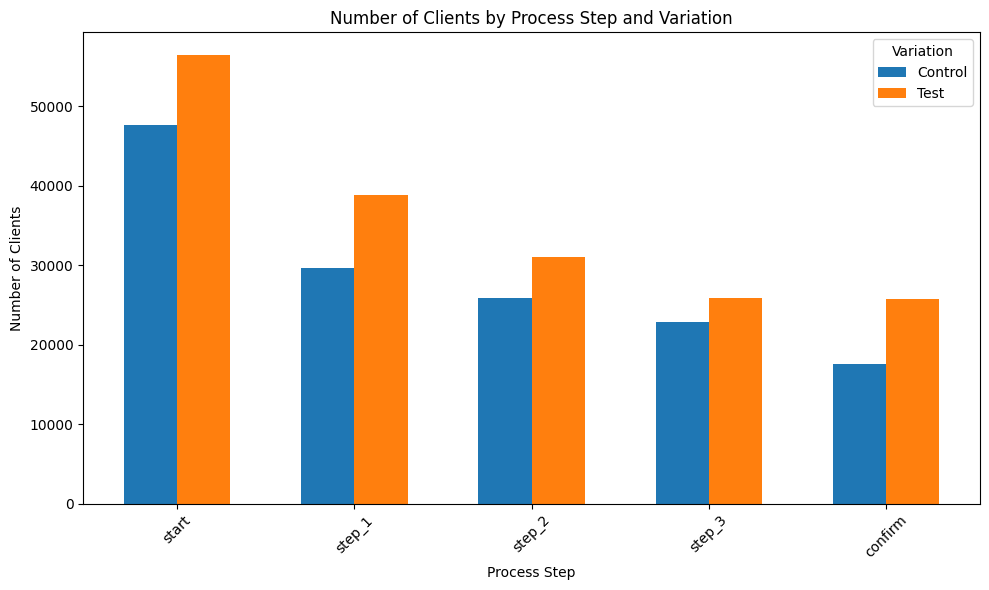

In [40]:
# Step 1: Merge df_test_control with df_concat
merged_df = pd.merge(df_concat, df_test_control, on='client_id', how='inner')

# Step 2: Filter merged dataframe to include only clients present in both df_concat and df_test_control
filtered_df = merged_df[merged_df['client_id'].isin(df_test_control['client_id'])]

# Step 3: Filter the dataframe to include only clients who have completed all steps from start to confirm
filtered_df = filtered_df[filtered_df['process_step'].isin(['start', 'step_1', 'step_2', 'step_3', 'confirm'])]

# Step 4: Group by process step and variation and count the number of clients
grouped_df = filtered_df.groupby(['process_step', 'Variation']).size().unstack()

# Step 5: Calculate total number of clients for each process step and sort the dataframe
grouped_df['Total'] = grouped_df.sum(axis=1)
grouped_df = grouped_df.sort_values(by='Total', ascending=False)
grouped_df.drop(columns='Total', inplace=True)

# Step 6: Plot the results as stacked bar charts side by side
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.30
index = range(len(grouped_df.index))

# Plot bars for 'Control' and 'Test' side by side for each process step
bar1 = ax.bar(index, grouped_df['Control'], bar_width, label='Control')
bar2 = ax.bar([i + bar_width for i in index], grouped_df['Test'], bar_width, label='Test')

# Set title, labels, and ticks
ax.set_title('Number of Clients by Process Step and Variation')
ax.set_xlabel('Process Step')
ax.set_ylabel('Number of Clients')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(grouped_df.index, rotation=45)
ax.legend(title='Variation')

plt.tight_layout()
plt.show()


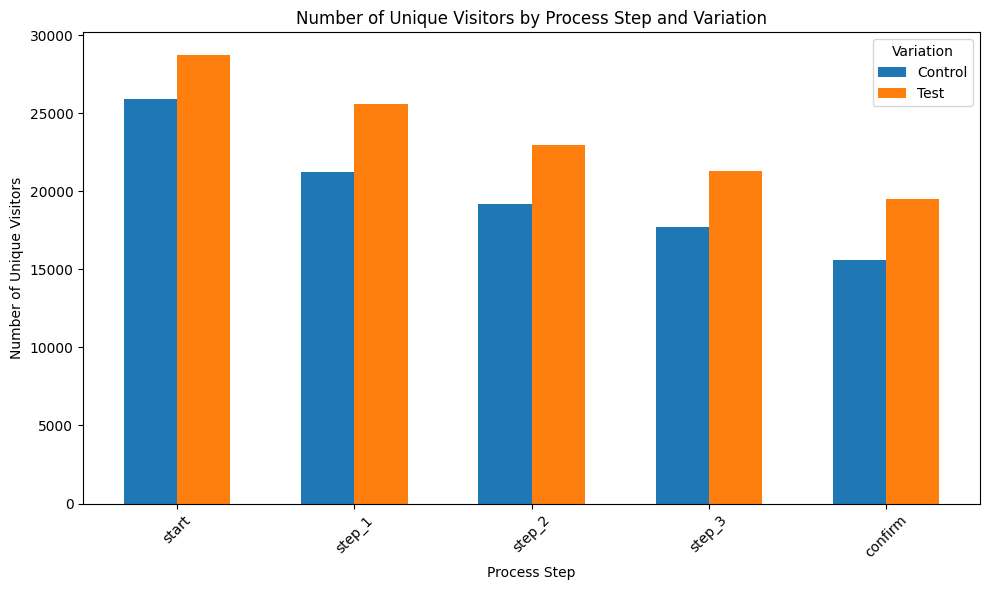

In [67]:
# Step 1: Merge df_test_control with df_concat
merged_df = pd.merge(df_concat, df_test_control, on='client_id', how='inner')

# Step 2: Filter merged dataframe to include only clients present in both df_concat and df_test_control
filtered_df = merged_df[merged_df['client_id'].isin(df_test_control['client_id'])]

# Step 3: Filter the dataframe to include only clients who have completed all steps from start to confirm
filtered_df = filtered_df[filtered_df['process_step'].isin(['start', 'step_1', 'step_2', 'step_3', 'confirm'])]

# Step 4: Group by process step and variation and count the number of unique visitor IDs
grouped_df = filtered_df.groupby(['process_step', 'Variation'])['visitor_id'].nunique().unstack()

# Step 5: Calculate total number of unique visitor IDs for each process step and sort the dataframe
grouped_df['Total'] = grouped_df.sum(axis=1)
grouped_df = grouped_df.sort_values(by='Total', ascending=False)
grouped_df.drop(columns='Total', inplace=True)

# Step 6: Plot the results as stacked bar charts side by side
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.30
index = range(len(grouped_df.index))

# Plot bars for 'Control' and 'Test' side by side for each process step
bar1 = ax.bar(index, grouped_df['Control'], bar_width, label='Control')
bar2 = ax.bar([i + bar_width for i in index], grouped_df['Test'], bar_width, label='Test')

# Set title, labels, and ticks
ax.set_title('Number of Unique Visitors by Process Step and Variation')
ax.set_xlabel('Process Step')
ax.set_ylabel('Number of Unique Visitors')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(grouped_df.index, rotation=45)
ax.legend(title='Variation')

plt.tight_layout()
plt.show()


In [73]:
# Map process steps to numbers
step_mapping = {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4}

# Completion Rate
total_started = grouped_df.loc[step_mapping['start']].sum()  # Total visitors who started the process
total_completed = grouped_df.loc[step_mapping['confirm']].sum()  # Total visitors who reached 'confirm' step
completion_rate = total_completed / total_started

# Time Spent on Each Step
time_spent = {}
for step in ['start', 'step_1', 'step_2', 'step_3', 'confirm']:
    if step == 'start':
        continue
    prev_step = step_mapping['start'] if step == 'step_1' else step_mapping[step] - 1
    time_spent[step] = (filtered_df[filtered_df['process_step'] == step]['date_time'] -
                        filtered_df[filtered_df['process_step'] == f'step_{prev_step}']['date_time']).mean()

# Error Rates
error_rates = {}
for step in ['start', 'step_1', 'step_2', 'step_3']:
    next_step = step_mapping[step] + 1
    error_count = filtered_df[(filtered_df['process_step'] == f'step_{next_step}') & 
                              (filtered_df['visitor_id'].duplicated(keep=False))].shape[0]
    total_count = filtered_df[filtered_df['process_step'] == step].shape[0]
    error_rates[step] = error_count / total_count

print("Completion Rate:", completion_rate)
print("Time Spent on Each Step:", time_spent)
print("Error Rates:", error_rates)



KeyError: 0

In [69]:
merged_df['client_id'].head(9)

0    7179755
1    7179755
2    7179755
3    7179755
4    7179755
5    4192640
6    4192640
7    4192640
8    4192640
Name: client_id, dtype: int64

In [54]:
merged_df.nunique()

client_id        50500
visitor_id       56011
visit_id         69205
process_step         5
date_time       283344
Variation            2
dtype: int64

In [34]:
df_concat['visitor_id'].nunique()

130236

In [46]:
df_concat.isna().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [51]:
merged_df.isna().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
Variation       0
dtype: int64

In [ ]:
merged_df

In [58]:
# Filter the DataFrame for the specific client_id
specific_client_df = df_concat[df_concat['client_id'] == 7179755]

# Extract the visitor_id column
visitor_ids = specific_client_df['visit_id']

# Print the unique visitor_ids
print(visitor_ids.unique())


['264484508_5982901710_928530']


In [66]:
# Calculate the count of unique visitor_ids for each client_id
visitor_counts_by_client = df_concat.groupby('client_id')['visitor_id'].nunique()

# Print the counts
visitor_counts_by_client.sort_values(ascending=False)


client_id
9008485    14
8167818    13
323753     11
1771611    11
6305830    11
           ..
3507622     1
3507472     1
3507471     1
3507329     1
9999875     1
Name: visitor_id, Length: 120157, dtype: int64